In [1]:
import ImageRepresentationp
import ThesisToolkit
from ThesisToolkit import FeaturesIOToolkit as featuresIO
import numpy as np
import cv2 as cv
import os
import joblib
%matplotlib inline
from matplotlib import pyplot as plt 
from matplotlib import image as img
query_dir = "/mnt/datasets/daejeon_sv_v1_query_resized_delf/"
query_images_dir = "/mnt/datasets/daejeon_sv_v1_query_full/"
database_dir = "/mnt/datasets/daejeon_sv_v1_sppvlad256_delf/"
image_dir = "/mnt/datasets/daejeon_sv_v1/"
saved_model = "/mnt/datasets/codebook/delf_256_model.pkl"

/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [2]:
ir = ImageRepresentation.ImageRepresentation(name = 'delf_vlad', saved_model = saved_model )
print(ir.codebook.cluster_centers_.shape)
pca_model = "/mnt/datasets/pca/delf_vlad256_512_whiten.pkl"
transformer = joblib.load(pca_model)

(256, 40)


In [3]:
query_vectors = []
queries = []
query_images = []


# for f in os.listdir(query_dir):
#     filename, ext = f.split('.')
#     if ext == 'JPG' or ext == 'jpg':
#         queries.append(filename)
#         im = cv.imread(os.path.join(query_dir, f), flags=cv.IMREAD_UNCHANGED)
#         query_images.append(cv.cvtColor(im, cv.COLOR_RGB2BGR))
#         gray = cv.cvtColor(im, cv.COLOR_RGB2GRAY)
#         features = _GetSingleImageFeature(gray)[1]
#         bow_vector = ir.VLADEncode(features)
#         query_vectors.append(bow_vector)

for f in os.listdir(query_dir):
    filename, ext = f.split('.')
    if ext == 'DELF' or ext == 'delf':
        queries.append(filename)
        im = cv.imread(os.path.join(query_images_dir, filename + '.jpg'), flags=cv.IMREAD_UNCHANGED)
        query_images.append(cv.cvtColor(im, cv.COLOR_RGB2BGR))
        ret = featuresIO().DelfReadSingleImage(os.path.join(query_dir, f))
        locs = ret[1]
        features = ret[2]
        vector = ir.MP_VLADEncode(image_features=features, image_locs=locs, grid=0, pca=False, transformer=transformer)
        query_vectors.append(vector)

# for f in os.listdir(query_dir):
#     filename = f.split('.')[0]
#     queries.append(filename)
#     im = cv.imread(os.path.join(query_images_dir, filename + '.jpg'), flags=cv.IMREAD_UNCHANGED)
#     query_images.append(cv.cvtColor(im, cv.COLOR_RGB2BGR))
#     vector = np.load(os.path.join(query_dir, f), allow_pickle=True)
#     query_vectors.append(vector)

W1209 17:48:17.646733 140557446952704 deprecation.py:323] From /home/canhld/workplace/models/research/delf/delf/python/feature_io.py:171: FastGFile.__init__ (from tensorflow.python.platform.gfile) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.gfile.GFile.


(51200,)
(51200,)
(51200,)
(51200,)
(51200,)
(51200,)
(51200,)
(51200,)
(51200,)
(51200,)
(51200,)
(51200,)
(51200,)
(51200,)
(51200,)
(51200,)
(51200,)
(51200,)
(51200,)
(51200,)
(51200,)
(51200,)
(51200,)
(51200,)
(51200,)
(51200,)
(51200,)
(51200,)
(51200,)
(51200,)
(51200,)
(51200,)
(51200,)
(51200,)
(51200,)
(51200,)
(51200,)
(51200,)
(51200,)
(51200,)
(51200,)
(51200,)
(51200,)
(51200,)
(51200,)
(51200,)
(51200,)
(51200,)
(51200,)
(51200,)
(51200,)
(51200,)
(51200,)
(51200,)
(51200,)
(51200,)
(51200,)


In [4]:
database = []
indexes = []
for f in os.listdir(database_dir):
    filename = f.split('.')
    vector = np.load(os.path.join(database_dir, f), allow_pickle=True)
    indexes.append(filename[0])
    database.append(vector)

Query IMG_0407


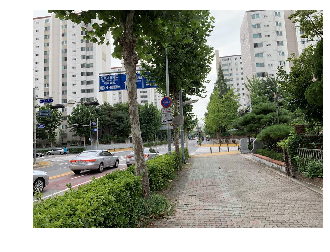

Retrieval top-5 result:


KeyError: 'IMG_0407'

<Figure size 1440x576 with 0 Axes>

In [8]:
plt.subplot() 
query_name = "IMG_0407"
query_index = 0
top_ranks = 50
for query_index in range(len(queries)):
    if queries[query_index] == query_name:
        break
test_query = queries[query_index]
test_vector = query_vectors[query_index]
test_image = query_images[query_index]
rank_list = []
# plt.plot(test_vector)
# plt.show()
for vector, index in zip(database,indexes):
    rank_list.append((index, np.dot(vector, test_vector)))
rank_list.sort(key = lambda tup: tup[1], reverse=True)
predict = []
for i in range(top_ranks):
    predict.append(rank_list[i][0])
print("Query %s" % test_query)
plt.axis('off')
plt.imshow(test_image)
plt.show()
ref_file = "/mnt/datasets/daejeon_sv_v1_query_40m.csv"
with open(ref_file) as f:
    contents = f.readlines()
lines = [x.strip('\n') for x in contents]
ref = dict()
for line in lines:
    tup = line.split(',')
    ref[tup[0]] = set(tup[1:])
print("Retrieval top-5 result:")
plt.figure(figsize=(20,8))
for i in range(10):
    if(predict[i][:-6] in ref[query_name]):
       print(predict[i],1)
    else:
       print(predict[i],0)
    im = img.imread(os.path.join(image_dir, predict[i] + '.jpg'))
    plt.subplot(2,5,i+1) 
    plt.axis('off')
    plt.imshow(im)
plt.show()
print(query_vectors[query_index].shape)

In [ ]:
#### import ThesisToolkit
from scipy import spatial
from skimage import feature
from skimage import measure
from skimage import transform
featureIO = ThesisToolkit.FeaturesIOToolkit
database_features_dir = "/mnt/datasets/daejeon_sv_v1_delf/"
query_locs, query_des = featureIO.DelfReadSingleImage(features_path = os.path.join(query_dir, query_name + '.delf'))
nums_features_q = len(query_des)
# Create query tree for this query
q_tree = spatial.cKDTree(query_des)
rerank_list = []
for im in predict:
    print(im)
    im_locs, im_des = featureIO.DelfReadSingleImage(features_path = os.path.join(database_features_dir, im + '.delf'))
    nums_features_im = len(im_des)
    _, indices = q_tree.query(im_des, distance_upper_bound = 0.8)
    location_to_use_im = np.array([
        im_locs[i]
        for i in range(min(nums_features_im, nums_features_q))
        if indices[i] != nums_features_q
    ])
    location_to_use_q = np.array([
        query_locs[indices[i]]
        for i in range(min(nums_features_im, nums_features_q))
        if indices[i] != nums_features_q
    ])
    _, inliers = measure.ransac((location_to_use_q, location_to_use_im),
                      transform.AffineTransform,
                      min_samples=3,
                      residual_threshold=20,
                      max_trials=1000)
    print('%s: Found %d inliers from %d loc' % (im, sum(inliers), len(location_to_use_im)))
    rerank_list.append((im, sum(inliers)))
rerank_list.sort(key = lambda tup: tup[1], reverse = True)

Query IMG_0435


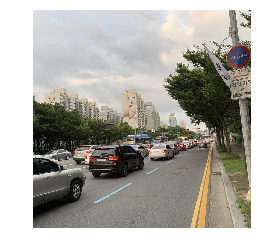

Retrieval top-5 result:
('2050_gsv_7', 36) 0
('1304_gsv_1', 35) 0
('1133_gsv_1', 34) 0
('1137_gsv_1', 34) 0
('2051_gsv_6', 33) 0
('1956_gsv_6', 33) 0
('1134_gsv_1', 32) 0
('63_gsv_2', 32) 0
('1882_gsv_6', 31) 0
('1136_gsv_2', 31) 0


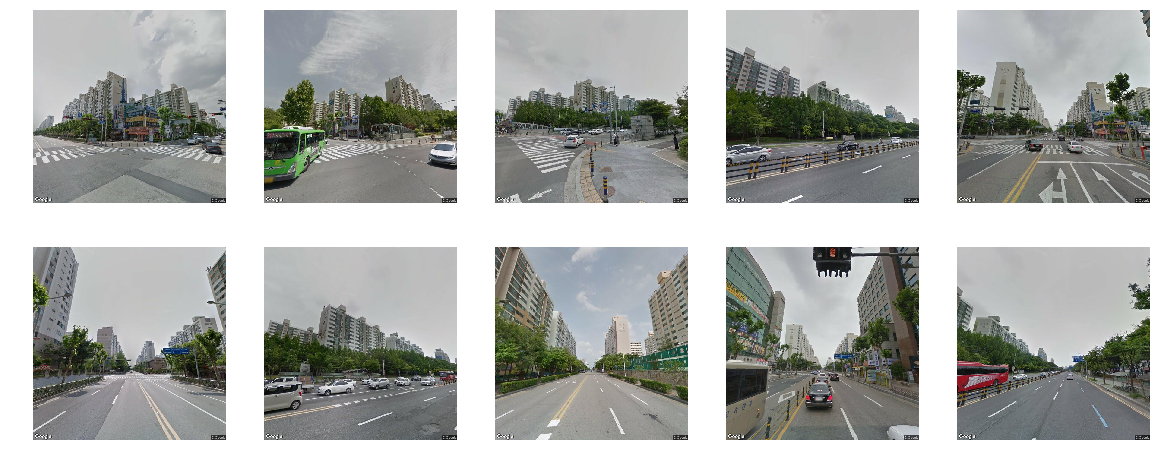

In [7]:
print("Query %s" % test_query)
plt.axis('off')
plt.imshow(test_image)
plt.show()
print("Retrieval top-5 result:")

ref_file = "/mnt/datasets/daejeon_sv_v1_query_50m.csv"
with open(ref_file) as f:
    contents = f.readlines()
lines = [x.strip('\n') for x in contents]
ref = dict()
for line in lines:
    tup = line.split(',')
    ref[tup[0]] = set(tup[1:])

plt.figure(figsize=(20,8))
for i in range(10):
    if (rerank_list[i][0][:-6]) in ref[query_name]:
        print(rerank_list[i],1)
    else: 
        print(rerank_list[i],0)
    im = img.imread(os.path.join(image_dir, rerank_list[i][0] + '.jpg'))
    plt.subplot(2,5,i+1) 
    plt.axis('off')
    plt.imshow(im)
plt.show()

In [ ]:
predicts = []
top_ranks = 50
for query,image,query_vector in zip(queries, query_images, query_vectors):
    rank_list = []
    predict = []
    predict.append(query)
    for vector, index in zip(database,indexes):
        rank_list.append((index, np.dot(vector, query_vector)))
    rank_list.sort(key = lambda tup: tup[1], reverse=True)
    for i in range(top_ranks):
        predict.append(rank_list[i][0])
    predicts.append(predict)
print(predicts)

In [ ]:
ref_file = "/mnt/datasets/daejeon_sv_v1_query_30m.csv"
with open(ref_file) as f:
    contents = f.readlines()
lines = [x.strip('\n') for x in contents]
ref = dict()
for line in lines:
    tup = line.split(',')
    ref[tup[0]] = set(tup[1:])
results = []
images = []
for predict in predicts:
    result = []
    query = predict[0]
#     result.append(query)
    rank_list = predict[1:]
    first_correct = 0
    for item in rank_list:
        if item[:-6] in ref[query]:
            result.append(1)
        else:
            result.append(0)
    results.append(np.array(result))
# Recall calculation:
recall_results = []
for result in results:
    recall_result = []
    first_correct = 0
    for item in result:
        if item == 1:
            for i in range(first_correct, len(result)):
                recall_result.append(1)
            break
        else:
            recall_result.append(0)
            first_correct += 1
    recall_results.append(np.array(recall_result))

top_retrieval = 20
recall = np.array([0]*top_retrieval)
for recall_result in recall_results:
    recall += recall_result[:top_retrieval]
recall = recall/float(len(queries))
print(recall)

# Precision calculation
precision = []
precision_rank = np.array([0]*top_retrieval)
for result in results:
    precision_rank += result[:top_retrieval]
s = 0
for i in range(0,len(precision_rank)):
    s += precision_rank[i]
    precision.append(s/((i+1)*len(queries)))
print(np.array(precision))

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(10,8)
axes[0,0].plot(recall)
axes[0,1].plot(precision)
axes[1,0].plot(recall, precision, marker = "o")

In [10]:
# # Spartial geometric verification to re-reank the result
# # Load all database delf features:
# query_images, ir._ReadDelfFeatures()
# # OpenCV RANSAC
# for predict in zip(queries,predicts):
#     re_rank_list = []
#     query = predict[0]
#     rank_list = predict[1:]
#     for im in rank_list:
        

In [11]:
import ThesisToolkit
from scipy import spatial
from skimage import feature
from skimage import measure
from skimage import transform
featureIO = ThesisToolkit.FeaturesIOToolkit

In [12]:
# test_images, test_locations, test_features = test.DelfReadDirectory(directory = query_dir)
database_features_dir = "/mnt/datasets/daejeon_sv_v1_delf/"
gv_predicts = []
for predict in predicts:
    query = predict[0]
    query_locs, query_des = featureIO.DelfReadSingleImage(features_path = os.path.join(query_dir, query + '.delf'))
    nums_features_q = len(query_des)
    # Create query tree for this query
    q_tree = spatial.cKDTree(query_des)
    rank_list = predict[1:]
    rerank_list = []
    gv_list = []
    gv_list.append(query)
    for im in rank_list:
        im_locs, im_des = featureIO.DelfReadSingleImage(features_path = os.path.join(database_features_dir, im + '.delf'))
        nums_features_im = len(im_des)
        _, indices = q_tree.query(im_des, distance_upper_bound = 0.8)
        location_to_use_im = np.array([
            im_locs[i]
            for i in range(min(nums_features_im, nums_features_q))
            if indices[i] != nums_features_q
        ])
        location_to_use_q = np.array([
            query_locs[indices[i]]
            for i in range(min(nums_features_im, nums_features_q))
            if indices[i] != nums_features_q
        ])
        _, inliers = measure.ransac((location_to_use_q, location_to_use_im),
                          transform.AffineTransform,
                          min_samples=3,
                          residual_threshold=20,
                          max_trials=1000)
        print('%s: Found %d inliers from %d loc' % (im, sum(inliers), len(location_to_use_im)))
        rerank_list.append((im, sum(inliers)))
    rerank_list.sort(key = lambda tup: tup[1], reverse = True)
    for im in rerank_list:
        gv_list.append(im[0])
    print(gv_list)
    gv_predicts.append(gv_list)

1877_gsv_2: Found 50 inliers from 286 loc
1878_gsv_2: Found 47 inliers from 301 loc
1879_gsv_2: Found 32 inliers from 235 loc
1791_gsv_2: Found 21 inliers from 248 loc
3090_gsv_3: Found 14 inliers from 176 loc
927_gsv_3: Found 15 inliers from 92 loc
1207_gsv_4: Found 14 inliers from 288 loc
3008_gsv_7: Found 12 inliers from 123 loc
432_gsv_7: Found 11 inliers from 132 loc
3168_gsv_2: Found 13 inliers from 141 loc
1967_gsv_0: Found 27 inliers from 270 loc
4254_gsv_2: Found 18 inliers from 185 loc
1792_gsv_1: Found 21 inliers from 243 loc
174_gsv_0: Found 19 inliers from 243 loc
1881_gsv_1: Found 18 inliers from 210 loc
2051_gsv_2: Found 23 inliers from 237 loc
968_gsv_2: Found 19 inliers from 147 loc
2225_gsv_5: Found 21 inliers from 238 loc
1907_gsv_6: Found 13 inliers from 138 loc
1962_gsv_2: Found 21 inliers from 245 loc
2050_gsv_3: Found 35 inliers from 206 loc
2310_gsv_5: Found 19 inliers from 273 loc
2052_gsv_4: Found 15 inliers from 214 loc
100_gsv_4: Found 16 inliers from 173 lo

2136_gsv_2: Found 37 inliers from 341 loc
2049_gsv_1: Found 55 inliers from 387 loc
1963_gsv_0: Found 20 inliers from 357 loc
2051_gsv_0: Found 22 inliers from 280 loc
2049_gsv_2: Found 29 inliers from 350 loc
2137_gsv_0: Found 22 inliers from 367 loc
1877_gsv_1: Found 71 inliers from 267 loc
2050_gsv_1: Found 54 inliers from 250 loc
1792_gsv_5: Found 12 inliers from 70 loc
1878_gsv_1: Found 55 inliers from 256 loc
3344_gsv_7: Found 14 inliers from 145 loc
1791_gsv_1: Found 38 inliers from 201 loc
2653_gsv_3: Found 14 inliers from 155 loc
2053_gsv_7: Found 13 inliers from 198 loc
2136_gsv_3: Found 23 inliers from 286 loc
1879_gsv_0: Found 28 inliers from 169 loc
1908_gsv_7: Found 16 inliers from 113 loc
191_gsv_3: Found 16 inliers from 166 loc
2222_gsv_3: Found 17 inliers from 207 loc
2048_gsv_1: Found 38 inliers from 218 loc
3174_gsv_3: Found 18 inliers from 174 loc
518_gsv_3: Found 14 inliers from 178 loc
1877_gsv_0: Found 49 inliers from 275 loc
696_gsv_4: Found 16 inliers from 178 

3155_gsv_7: Found 28 inliers from 156 loc
3327_gsv_7: Found 23 inliers from 167 loc
3153_gsv_0: Found 21 inliers from 221 loc
3155_gsv_0: Found 20 inliers from 180 loc
3151_gsv_0: Found 17 inliers from 184 loc
3152_gsv_0: Found 22 inliers from 199 loc
3415_gsv_6: Found 16 inliers from 186 loc
2836_gsv_5: Found 15 inliers from 93 loc
3156_gsv_7: Found 20 inliers from 116 loc
3153_gsv_7: Found 22 inliers from 177 loc
3070_gsv_7: Found 30 inliers from 175 loc
3152_gsv_1: Found 17 inliers from 145 loc
3327_gsv_0: Found 18 inliers from 172 loc
2922_gsv_5: Found 11 inliers from 70 loc
2982_gsv_0: Found 21 inliers from 190 loc
1991_gsv_5: Found 16 inliers from 127 loc
3151_gsv_1: Found 24 inliers from 167 loc
1448_gsv_5: Found 10 inliers from 59 loc
2982_gsv_7: Found 24 inliers from 162 loc
3239_gsv_7: Found 17 inliers from 111 loc
1204_gsv_1: Found 9 inliers from 51 loc
3154_gsv_7: Found 15 inliers from 105 loc
1203_gsv_1: Found 9 inliers from 51 loc
2835_gsv_5: Found 13 inliers from 82 loc


2665_gsv_7: Found 33 inliers from 195 loc
2578_gsv_0: Found 21 inliers from 210 loc
1969_gsv_5: Found 17 inliers from 137 loc
2579_gsv_0: Found 23 inliers from 160 loc
2493_gsv_0: Found 35 inliers from 147 loc
1970_gsv_5: Found 12 inliers from 112 loc
2578_gsv_7: Found 25 inliers from 131 loc
2836_gsv_7: Found 9 inliers from 61 loc
2579_gsv_7: Found 42 inliers from 135 loc
1881_gsv_0: Found 16 inliers from 139 loc
2740_gsv_6: Found 10 inliers from 77 loc
2665_gsv_0: Found 36 inliers from 186 loc
701_gsv_5: Found 14 inliers from 133 loc
871_gsv_3: Found 14 inliers from 177 loc
1118_gsv_5: Found 12 inliers from 56 loc
3090_gsv_4: Found 10 inliers from 95 loc
161_gsv_3: Found 19 inliers from 136 loc
1029_gsv_2: Found 8 inliers from 30 loc
1199_gsv_6: Found 9 inliers from 38 loc
798_gsv_4: Found 12 inliers from 59 loc
3255_gsv_3: Found 11 inliers from 80 loc
1396_gsv_5: Found 13 inliers from 70 loc
2310_gsv_0: Found 9 inliers from 102 loc
871_gsv_4: Found 16 inliers from 156 loc
2222_gsv_4

1547_gsv_7: Found 54 inliers from 247 loc
1461_gsv_7: Found 59 inliers from 244 loc
1631_gsv_7: Found 41 inliers from 221 loc
1546_gsv_7: Found 73 inliers from 266 loc
1718_gsv_6: Found 20 inliers from 236 loc
1803_gsv_6: Found 31 inliers from 231 loc
1460_gsv_7: Found 68 inliers from 246 loc
1632_gsv_7: Found 28 inliers from 224 loc
1375_gsv_7: Found 67 inliers from 219 loc
1802_gsv_6: Found 21 inliers from 229 loc
1892_gsv_6: Found 28 inliers from 190 loc
1718_gsv_7: Found 32 inliers from 193 loc
1462_gsv_7: Found 38 inliers from 151 loc
2064_gsv_6: Found 23 inliers from 201 loc
1373_gsv_7: Found 46 inliers from 219 loc
1374_gsv_0: Found 22 inliers from 181 loc
2064_gsv_5: Found 41 inliers from 195 loc
1374_gsv_7: Found 46 inliers from 215 loc
1287_gsv_7: Found 26 inliers from 191 loc
1631_gsv_6: Found 29 inliers from 217 loc
1290_gsv_7: Found 49 inliers from 198 loc
3176_gsv_1: Found 13 inliers from 85 loc
1202_gsv_7: Found 18 inliers from 170 loc
1890_gsv_5: Found 21 inliers from 1

1954_gsv_4: Found 23 inliers from 480 loc
1952_gsv_4: Found 51 inliers from 368 loc
1609_gsv_4: Found 33 inliers from 440 loc
1868_gsv_4: Found 39 inliers from 376 loc
2009_gsv_4: Found 15 inliers from 398 loc
2250_gsv_3: Found 17 inliers from 209 loc
2039_gsv_4: Found 40 inliers from 415 loc
2242_gsv_7: Found 20 inliers from 218 loc
1958_gsv_4: Found 27 inliers from 496 loc
1934_gsv_4: Found 18 inliers from 435 loc
2099_gsv_4: Found 22 inliers from 324 loc
1928_gsv_4: Found 22 inliers from 422 loc
1872_gsv_4: Found 18 inliers from 476 loc
1955_gsv_4: Found 17 inliers from 510 loc
1871_gsv_4: Found 20 inliers from 505 loc
1610_gsv_4: Found 36 inliers from 329 loc
2005_gsv_4: Found 18 inliers from 437 loc
2125_gsv_4: Found 59 inliers from 352 loc
1881_gsv_7: Found 15 inliers from 199 loc
2641_gsv_4: Found 20 inliers from 283 loc
1959_gsv_4: Found 25 inliers from 476 loc
255_gsv_5: Found 9 inliers from 74 loc
1437_gsv_4: Found 21 inliers from 297 loc
1957_gsv_4: Found 24 inliers from 478

388_gsv_4: Found 12 inliers from 92 loc
1200_gsv_7: Found 15 inliers from 133 loc
2750_gsv_4: Found 25 inliers from 166 loc
987_gsv_3: Found 14 inliers from 88 loc
394_gsv_1: Found 20 inliers from 126 loc
2615_gsv_1: Found 11 inliers from 130 loc
3045_gsv_1: Found 20 inliers from 129 loc
3149_gsv_0: Found 11 inliers from 102 loc
1365_gsv_1: Found 22 inliers from 250 loc
824_gsv_1: Found 23 inliers from 193 loc
821_gsv_1: Found 24 inliers from 214 loc
909_gsv_1: Found 22 inliers from 236 loc
1974_gsv_3: Found 21 inliers from 194 loc
1795_gsv_2: Found 15 inliers from 108 loc
1975_gsv_4: Found 18 inliers from 198 loc
1960_gsv_2: Found 22 inliers from 225 loc
2922_gsv_4: Found 20 inliers from 129 loc
1027_gsv_0: Found 14 inliers from 157 loc
894_gsv_6: Found 12 inliers from 100 loc
3435_gsv_0: Found 12 inliers from 245 loc
906_gsv_1: Found 25 inliers from 238 loc
3244_gsv_3: Found 24 inliers from 233 loc
505_gsv_0: Found 20 inliers from 109 loc
3435_gsv_1: Found 15 inliers from 170 loc
145

3196_gsv_2: Found 17 inliers from 111 loc
3196_gsv_3: Found 16 inliers from 147 loc
3196_gsv_0: Found 14 inliers from 74 loc
1030_gsv_4: Found 47 inliers from 137 loc
3196_gsv_4: Found 20 inliers from 143 loc
771_gsv_4: Found 53 inliers from 154 loc
3196_gsv_5: Found 17 inliers from 152 loc
944_gsv_4: Found 47 inliers from 136 loc
1200_gsv_4: Found 57 inliers from 153 loc
3196_gsv_1: Found 12 inliers from 75 loc
3196_gsv_6: Found 13 inliers from 79 loc
1115_gsv_4: Found 36 inliers from 130 loc
858_gsv_4: Found 56 inliers from 150 loc
774_gsv_4: Found 22 inliers from 138 loc
857_gsv_4: Found 58 inliers from 157 loc
3196_gsv_7: Found 16 inliers from 72 loc
772_gsv_4: Found 39 inliers from 135 loc
83_gsv_1: Found 46 inliers from 157 loc
1028_gsv_4: Found 38 inliers from 123 loc
1029_gsv_6: Found 12 inliers from 52 loc
1201_gsv_4: Found 37 inliers from 130 loc
1118_gsv_1: Found 9 inliers from 46 loc
943_gsv_4: Found 39 inliers from 126 loc
1116_gsv_4: Found 34 inliers from 141 loc
1027_gsv

1802_gsv_6: Found 24 inliers from 159 loc
1804_gsv_6: Found 17 inliers from 205 loc
1539_gsv_7: Found 7 inliers from 66 loc
1026_gsv_0: Found 10 inliers from 125 loc
1632_gsv_6: Found 14 inliers from 153 loc
3169_gsv_4: Found 8 inliers from 81 loc
992_gsv_0: Found 8 inliers from 77 loc
1028_gsv_7: Found 13 inliers from 84 loc
1890_gsv_5: Found 11 inliers from 69 loc
1028_gsv_0: Found 13 inliers from 93 loc
3427_gsv_0: Found 7 inliers from 89 loc
696_gsv_0: Found 10 inliers from 49 loc
1803_gsv_6: Found 27 inliers from 137 loc
1199_gsv_7: Found 7 inliers from 21 loc
1719_gsv_6: Found 14 inliers from 142 loc
1027_gsv_0: Found 8 inliers from 73 loc
1803_gsv_2: Found 10 inliers from 70 loc
648_gsv_3: Found 11 inliers from 56 loc
1632_gsv_7: Found 20 inliers from 158 loc
2827_gsv_2: Found 7 inliers from 62 loc
1304_gsv_7: Found 12 inliers from 92 loc
1969_gsv_4: Found 16 inliers from 100 loc
994_gsv_0: Found 8 inliers from 72 loc
1118_gsv_5: Found 8 inliers from 28 loc
1200_gsv_7: Found 9 i

986_gsv_6: Found 36 inliers from 131 loc
1073_gsv_6: Found 35 inliers from 168 loc
1156_gsv_5: Found 27 inliers from 209 loc
983_gsv_4: Found 17 inliers from 132 loc
984_gsv_5: Found 30 inliers from 168 loc
25_gsv_4: Found 14 inliers from 129 loc
1155_gsv_4: Found 16 inliers from 112 loc
986_gsv_5: Found 36 inliers from 147 loc
1067_gsv_3: Found 31 inliers from 166 loc
980_gsv_2: Found 19 inliers from 117 loc
3093_gsv_3: Found 12 inliers from 104 loc
3150_gsv_0: Found 19 inliers from 99 loc
1073_gsv_5: Found 37 inliers from 156 loc
985_gsv_6: Found 20 inliers from 133 loc
984_gsv_4: Found 13 inliers from 114 loc
1895_gsv_5: Found 16 inliers from 118 loc
1067_gsv_2: Found 19 inliers from 133 loc
973_gsv_2: Found 20 inliers from 119 loc
1298_gsv_5: Found 13 inliers from 141 loc
985_gsv_5: Found 24 inliers from 149 loc
978_gsv_2: Found 22 inliers from 115 loc
1984_gsv_5: Found 17 inliers from 166 loc
3387_gsv_7: Found 13 inliers from 65 loc
38_gsv_7: Found 21 inliers from 128 loc
1156_gsv

1945_gsv_6: Found 46 inliers from 242 loc
1946_gsv_6: Found 37 inliers from 262 loc
3387_gsv_7: Found 26 inliers from 195 loc
3149_gsv_6: Found 35 inliers from 224 loc
992_gsv_0: Found 12 inliers from 85 loc
1944_gsv_6: Found 45 inliers from 245 loc
1948_gsv_5: Found 35 inliers from 267 loc
1093_gsv_7: Found 16 inliers from 150 loc
1523_gsv_5: Found 20 inliers from 281 loc
2641_gsv_7: Found 17 inliers from 122 loc
1945_gsv_5: Found 79 inliers from 325 loc
1947_gsv_6: Found 30 inliers from 245 loc
1004_gsv_0: Found 11 inliers from 91 loc
3088_gsv_2: Found 13 inliers from 99 loc
2615_gsv_0: Found 24 inliers from 165 loc
1016_gsv_0: Found 14 inliers from 83 loc
1936_gsv_6: Found 39 inliers from 270 loc
2010_gsv_5: Found 34 inliers from 294 loc
1944_gsv_5: Found 72 inliers from 317 loc
3386_gsv_7: Found 26 inliers from 210 loc
3088_gsv_3: Found 9 inliers from 71 loc
905_gsv_0: Found 13 inliers from 136 loc
3215_gsv_7: Found 27 inliers from 122 loc
3094_gsv_5: Found 13 inliers from 82 loc
1

2662_gsv_5: Found 48 inliers from 199 loc
2663_gsv_5: Found 49 inliers from 183 loc
2661_gsv_4: Found 33 inliers from 114 loc
2664_gsv_6: Found 35 inliers from 123 loc
2336_gsv_3: Found 16 inliers from 145 loc
1967_gsv_1: Found 19 inliers from 130 loc
2590_gsv_4: Found 18 inliers from 132 loc
1298_gsv_1: Found 14 inliers from 107 loc
64_gsv_6: Found 21 inliers from 132 loc
2503_gsv_4: Found 19 inliers from 158 loc
4358_gsv_5: Found 20 inliers from 192 loc
2750_gsv_5: Found 13 inliers from 77 loc
63_gsv_6: Found 19 inliers from 184 loc
1391_gsv_2: Found 7 inliers from 21 loc
2661_gsv_5: Found 19 inliers from 118 loc
4265_gsv_5: Found 19 inliers from 184 loc
2664_gsv_5: Found 40 inliers from 165 loc
63_gsv_7: Found 18 inliers from 106 loc
2663_gsv_6: Found 26 inliers from 100 loc
2249_gsv_6: Found 17 inliers from 123 loc
1991_gsv_6: Found 11 inliers from 128 loc
3071_gsv_4: Found 16 inliers from 111 loc
2578_gsv_6: Found 10 inliers from 63 loc
2148_gsv_6: Found 15 inliers from 101 loc
67

1199_gsv_6: Found 14 inliers from 83 loc
1118_gsv_2: Found 12 inliers from 75 loc
1029_gsv_3: Found 8 inliers from 55 loc
1118_gsv_3: Found 9 inliers from 71 loc
1199_gsv_5: Found 11 inliers from 62 loc
1118_gsv_1: Found 15 inliers from 65 loc
1118_gsv_5: Found 10 inliers from 69 loc
1029_gsv_2: Found 13 inliers from 61 loc
1029_gsv_6: Found 12 inliers from 72 loc
1118_gsv_6: Found 13 inliers from 78 loc
1199_gsv_3: Found 12 inliers from 78 loc
1199_gsv_1: Found 15 inliers from 51 loc
3196_gsv_2: Found 13 inliers from 103 loc
3196_gsv_4: Found 17 inliers from 129 loc
1199_gsv_4: Found 9 inliers from 50 loc
1199_gsv_7: Found 10 inliers from 48 loc
3196_gsv_3: Found 18 inliers from 132 loc
3196_gsv_0: Found 14 inliers from 92 loc
1029_gsv_1: Found 12 inliers from 42 loc
1029_gsv_7: Found 12 inliers from 60 loc
1029_gsv_5: Found 10 inliers from 63 loc
1199_gsv_0: Found 11 inliers from 35 loc
3196_gsv_6: Found 13 inliers from 90 loc
1118_gsv_4: Found 11 inliers from 50 loc
1118_gsv_7: Foun

3196_gsv_3: Found 18 inliers from 155 loc
1199_gsv_6: Found 12 inliers from 65 loc
871_gsv_3: Found 13 inliers from 169 loc
161_gsv_3: Found 19 inliers from 150 loc
445_gsv_6: Found 14 inliers from 112 loc
961_gsv_5: Found 18 inliers from 69 loc
3196_gsv_2: Found 14 inliers from 103 loc
1118_gsv_1: Found 15 inliers from 64 loc
1118_gsv_2: Found 10 inliers from 76 loc
699_gsv_3: Found 14 inliers from 186 loc
3094_gsv_5: Found 9 inliers from 61 loc
871_gsv_4: Found 13 inliers from 175 loc
812_gsv_7: Found 13 inliers from 86 loc
700_gsv_4: Found 13 inliers from 138 loc
3196_gsv_4: Found 18 inliers from 166 loc
699_gsv_4: Found 15 inliers from 175 loc
1118_gsv_7: Found 10 inliers from 56 loc
1118_gsv_0: Found 9 inliers from 50 loc
1118_gsv_3: Found 10 inliers from 64 loc
943_gsv_0: Found 16 inliers from 137 loc
1118_gsv_5: Found 9 inliers from 70 loc
1029_gsv_7: Found 12 inliers from 56 loc
1288_gsv_2: Found 19 inliers from 104 loc
1029_gsv_3: Found 10 inliers from 52 loc
1461_gsv_2: Found

1975_gsv_6: Found 23 inliers from 134 loc
2899_gsv_4: Found 23 inliers from 235 loc
3329_gsv_4: Found 40 inliers from 256 loc
2813_gsv_4: Found 28 inliers from 254 loc
1137_gsv_2: Found 21 inliers from 236 loc
2985_gsv_4: Found 18 inliers from 187 loc
2727_gsv_4: Found 22 inliers from 347 loc
394_gsv_2: Found 15 inliers from 83 loc
1695_gsv_4: Found 37 inliers from 316 loc
2419_gsv_1: Found 19 inliers from 124 loc
61_gsv_4: Found 41 inliers from 219 loc
1436_gsv_4: Found 40 inliers from 328 loc
458_gsv_0: Found 14 inliers from 124 loc
3071_gsv_4: Found 23 inliers from 221 loc
1174_gsv_7: Found 17 inliers from 121 loc
997_gsv_2: Found 21 inliers from 149 loc
2008_gsv_7: Found 21 inliers from 99 loc
3157_gsv_4: Found 27 inliers from 196 loc
60_gsv_4: Found 44 inliers from 184 loc
3340_gsv_0: Found 19 inliers from 229 loc
1905_gsv_6: Found 13 inliers from 84 loc
1202_gsv_4: Found 19 inliers from 142 loc
1992_gsv_6: Found 14 inliers from 125 loc
1992_gsv_5: Found 12 inliers from 93 loc
285

3094_gsv_6: Found 16 inliers from 97 loc
3008_gsv_7: Found 11 inliers from 103 loc
3093_gsv_0: Found 15 inliers from 150 loc
2836_gsv_7: Found 15 inliers from 92 loc
3095_gsv_5: Found 12 inliers from 84 loc
3094_gsv_5: Found 10 inliers from 78 loc
3094_gsv_7: Found 20 inliers from 106 loc
1970_gsv_5: Found 12 inliers from 91 loc
2751_gsv_7: Found 12 inliers from 69 loc
2835_gsv_7: Found 16 inliers from 78 loc
3008_gsv_6: Found 8 inliers from 67 loc
3009_gsv_7: Found 15 inliers from 88 loc
2664_gsv_7: Found 10 inliers from 79 loc
2749_gsv_7: Found 12 inliers from 76 loc
1060_gsv_4: Found 9 inliers from 53 loc
2837_gsv_7: Found 14 inliers from 88 loc
3009_gsv_6: Found 9 inliers from 72 loc
3082_gsv_6: Found 9 inliers from 71 loc
131_gsv_7: Found 12 inliers from 43 loc
3088_gsv_4: Found 7 inliers from 60 loc
273_gsv_5: Found 12 inliers from 104 loc
3092_gsv_0: Found 10 inliers from 109 loc
617_gsv_2: Found 7 inliers from 58 loc
3095_gsv_6: Found 13 inliers from 109 loc
3196_gsv_2: Found 1

1931_gsv_6: Found 47 inliers from 382 loc
1932_gsv_6: Found 46 inliers from 381 loc
1929_gsv_6: Found 53 inliers from 307 loc
1952_gsv_6: Found 48 inliers from 277 loc
1933_gsv_6: Found 44 inliers from 294 loc
1930_gsv_6: Found 33 inliers from 251 loc
1930_gsv_0: Found 12 inliers from 144 loc
2272_gsv_1: Found 24 inliers from 176 loc
2958_gsv_5: Found 24 inliers from 217 loc
1792_gsv_4: Found 16 inliers from 124 loc
3088_gsv_2: Found 15 inliers from 90 loc
1931_gsv_0: Found 17 inliers from 207 loc
1931_gsv_5: Found 42 inliers from 404 loc
1931_gsv_7: Found 17 inliers from 218 loc
1949_gsv_6: Found 46 inliers from 301 loc
2615_gsv_0: Found 32 inliers from 191 loc
60_gsv_3: Found 24 inliers from 233 loc
2098_gsv_1: Found 17 inliers from 127 loc
1934_gsv_6: Found 34 inliers from 250 loc
1950_gsv_5: Found 49 inliers from 348 loc
2099_gsv_1: Found 17 inliers from 142 loc
1950_gsv_6: Found 41 inliers from 314 loc
1946_gsv_6: Found 40 inliers from 270 loc
1951_gsv_5: Found 46 inliers from 344

1137_gsv_2: Found 50 inliers from 302 loc
1138_gsv_2: Found 48 inliers from 280 loc
1060_gsv_2: Found 56 inliers from 268 loc
1059_gsv_2: Found 57 inliers from 261 loc
973_gsv_2: Found 76 inliers from 251 loc
987_gsv_1: Found 32 inliers from 293 loc
1136_gsv_2: Found 47 inliers from 250 loc
1229_gsv_2: Found 34 inliers from 221 loc
1059_gsv_1: Found 48 inliers from 286 loc
1135_gsv_2: Found 42 inliers from 248 loc
1143_gsv_2: Found 36 inliers from 259 loc
973_gsv_1: Found 66 inliers from 337 loc
1060_gsv_1: Found 58 inliers from 285 loc
980_gsv_2: Found 27 inliers from 161 loc
906_gsv_1: Found 36 inliers from 301 loc
1159_gsv_2: Found 39 inliers from 220 loc
905_gsv_1: Found 25 inliers from 268 loc
931_gsv_2: Found 30 inliers from 223 loc
1159_gsv_1: Found 26 inliers from 273 loc
1821_gsv_3: Found 12 inliers from 148 loc
83_gsv_0: Found 13 inliers from 124 loc
388_gsv_4: Found 20 inliers from 133 loc
930_gsv_2: Found 24 inliers from 182 loc
985_gsv_2: Found 29 inliers from 227 loc
1134

2727_gsv_4: Found 33 inliers from 346 loc
2899_gsv_4: Found 36 inliers from 246 loc
2899_gsv_3: Found 33 inliers from 278 loc
3290_gsv_3: Found 28 inliers from 308 loc
2985_gsv_4: Found 25 inliers from 226 loc
3376_gsv_4: Found 26 inliers from 286 loc
3202_gsv_3: Found 35 inliers from 218 loc
2641_gsv_4: Found 30 inliers from 254 loc
2555_gsv_3: Found 25 inliers from 244 loc
2555_gsv_4: Found 22 inliers from 349 loc
674_gsv_5: Found 24 inliers from 200 loc
3203_gsv_4: Found 28 inliers from 234 loc
3203_gsv_3: Found 29 inliers from 319 loc
3381_gsv_3: Found 22 inliers from 254 loc
4265_gsv_5: Found 24 inliers from 247 loc
3201_gsv_3: Found 32 inliers from 205 loc
3375_gsv_3: Found 26 inliers from 319 loc
1872_gsv_5: Found 23 inliers from 291 loc
3381_gsv_4: Found 20 inliers from 218 loc
2383_gsv_3: Found 24 inliers from 252 loc
3292_gsv_3: Found 21 inliers from 175 loc
2222_gsv_7: Found 26 inliers from 233 loc
2308_gsv_0: Found 28 inliers from 142 loc
2469_gsv_4: Found 24 inliers from 3

In [13]:
ref_file = "/mnt/datasets/daejeon_sv_v1_query_50m.csv"
with open(ref_file) as f:
    contents = f.readlines()
lines = [x.strip('\n') for x in contents]
ref = dict()
for line in lines:
    tup = line.split(',')
    ref[tup[0]] = set(tup[1:])
gv_results = []
for predict in gv_predicts:
    result = []
    query = predict[0]
#     result.append(query)
    rank_list = predict[1:]
    first_correct = 0
    for item in rank_list:
        if item[:-6] in ref[query]:
            result.append(1)
        else:
            result.append(0)
    gv_results.append(np.array(result))

for query,result in zip(queries,gv_results):
    print(query, result)

top_retrieval = 20
# Recall calculation:
recall_gv_results = []
for result in gv_results:
    recall_gv_result = []
    first_correct = 0
    for item in result:
        if item == 1:
            for i in range(first_correct, len(result)):
                recall_gv_result.append(1)
            break
        else:
            recall_gv_result.append(0)
            first_correct += 1
    recall_gv_results.append(np.array(recall_gv_result))

recall_gv = np.array([0]*top_retrieval)
for recall_gv_result in recall_gv_results:
    recall_gv += recall_gv_result[:top_retrieval]
recall_gv = recall_gv/float(len(queries))
print(recall_gv)

# Precision calculation
precision_gv = []
precision_gv_rank = np.array([0]*top_retrieval)
for result in gv_results:
    precision_gv_rank += result[:top_retrieval]
s = 0
for i in range(0,len(precision_gv_rank)):
    s += precision_gv_rank[i]
    precision_gv.append(s/((i+1)*len(queries)))
print(np.array(precision_gv))

IMG_0420 [1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0]
IMG_0588 [0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
IMG_0415 [1 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0]
IMG_0419 [1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0]
IMG_0398 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 1 1 0 0 0 0 0 0]
IMG_0413 [0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
IMG_0405 [1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
IMG_0394 [1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
IMG_0402 [1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0